# Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from  sklearn.preprocessing import LabelEncoder , StandardScaler

In [2]:
df = pd.read_csv('/Users/akshitgarg/Supply Chain/supply_chain_data.csv')

# Data Cleaning

In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [4]:
df.isnull().sum()
df.drop_duplicates(inplace=True)
df.columns = df.columns.str.strip()
for col in ['Price', 'Revenue generated', 'Shipping costs', 'Manufacturing costs', 'Costs']:
    print(col, df[col].describe())

Price count    100.000000
mean      49.462461
std       31.168193
min        1.699976
25%       19.597823
50%       51.239831
75%       77.198228
max       99.171329
Name: Price, dtype: float64
Revenue generated count     100.000000
mean     5776.048187
std      2732.841744
min      1061.618523
25%      2812.847151
50%      6006.352023
75%      8253.976921
max      9866.465458
Name: Revenue generated, dtype: float64
Shipping costs count    100.000000
mean       5.548149
std        2.651376
min        1.013487
25%        3.540248
50%        5.320534
75%        7.601695
max        9.929816
Name: Shipping costs, dtype: float64
Manufacturing costs count    100.000000
mean      47.266693
std       28.982841
min        1.085069
25%       22.983299
50%       45.905622
75%       68.621026
max       99.466109
Name: Manufacturing costs, dtype: float64
Costs count    100.000000
mean     529.245782
std      258.301696
min      103.916248
25%      318.778455
50%      520.430444
75%      763.078231


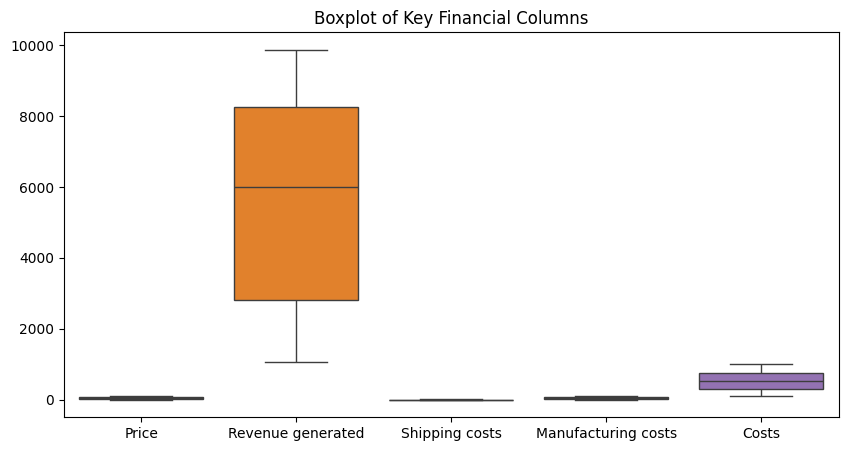

In [5]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Price', 'Revenue generated', 'Shipping costs', 'Manufacturing costs', 'Costs']])
plt.title("Boxplot of Key Financial Columns")
plt.show()

# EDA

## Univariate Analysis

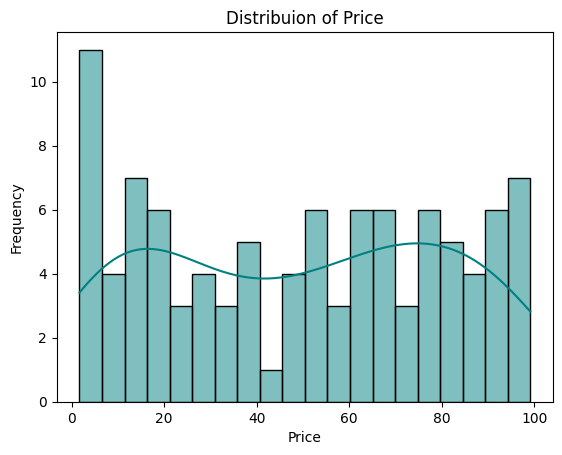

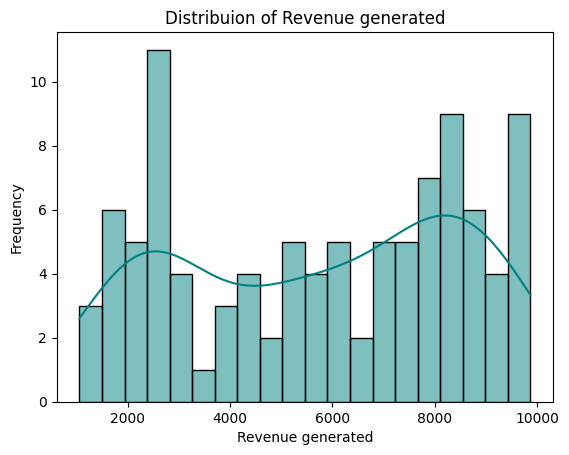

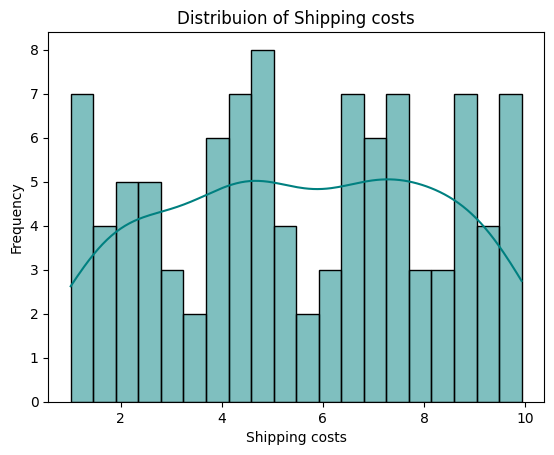

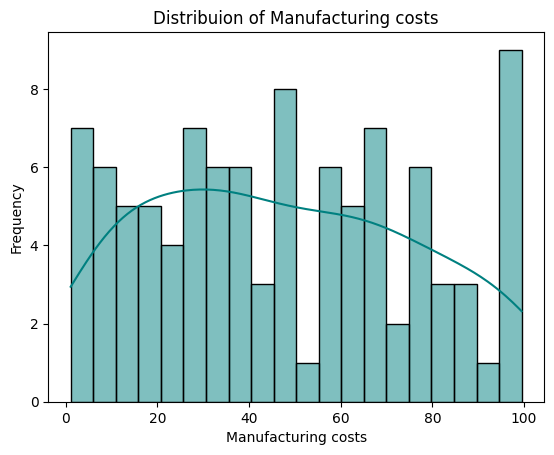

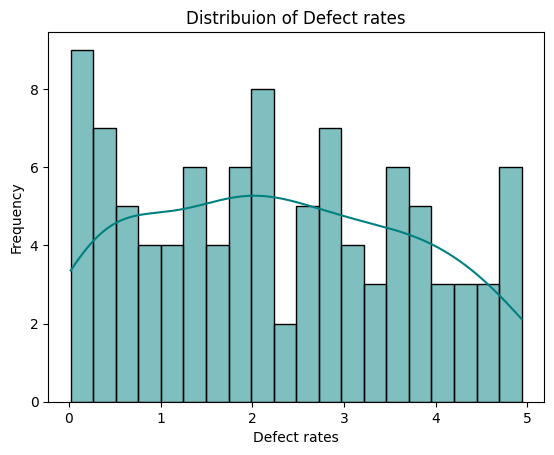

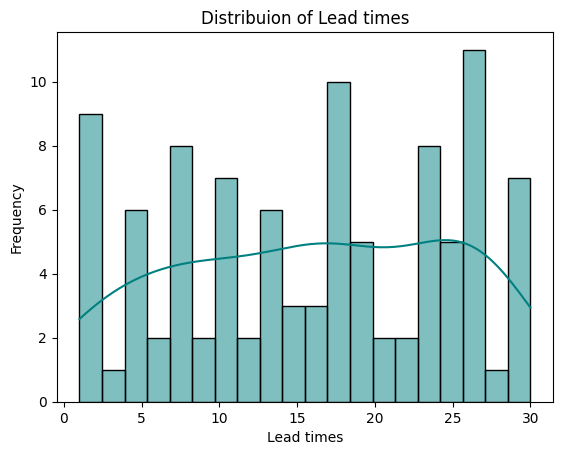

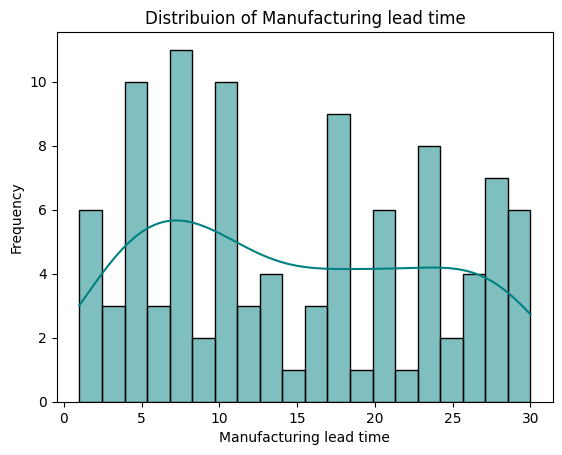

In [6]:
num_cols = ['Price', 'Revenue generated', 'Shipping costs','Manufacturing costs','Defect rates', 'Lead times', 'Manufacturing lead time']

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=20, color='teal')
    plt.title(f"Distribuion of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [7]:
cat_cols = ['Product type', 'Customer demographics','Supplier name','Transportation modes','Location','Inspection results']

for col in cat_cols:
    fig = px.pie(
        df,
        names=col,
        title=f"Distribution of {col}",
        hole=0.4,  
        color_discrete_sequence=px.colors.sequential.algae
        )
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

## Revenue & Sales Analysis

In [8]:
df['Profit'] = df['Revenue generated'] - (df['Manufacturing costs'] + df['Shipping costs'])
df['Profit Margin (%)'] = (df['Profit'] / df['Revenue generated']) * 100
df['Cost Ratio'] = (df['Manufacturing costs']+ df['Shipping costs']) / df['Revenue generated']

In [9]:
# Top Performing Product types
agg_df = df.groupby('Product type', as_index=False)['Revenue generated'].sum()
fig = px.bar(
    agg_df,
    x='Product type',
    y='Revenue generated',
    title='Total revenue by Product Type' 
)
fig.update_layout(yaxis_title='Total Revenue')
fig.update_xaxes(tickangle=45)
fig.show() 

In [10]:
fig = px.box(df, x='Product type', y='Profit Margin (%)', color='Product type',
             title='Profit Margin Distribution by Product Type')
fig.show()

In [11]:
# Relationship between Price and Sales Volume
fig = px.scatter(
    df,
    x='Price',
    y='Number of products sold',
    color='Product type',
    title='Price vs Number of Products Sold'
)

fig.update_layout(
    xaxis_title='Price',
    yaxis_title='Units Sold'
)
fig.show()

In [12]:
# Revenue vs Price 
fig= px.scatter(
    df,
    x='Price',
    y='Revenue generated',
    color ='Product type',
    title = 'Price vs Revenue Genrated'
)
fig.update_layout(
    xaxis_title='Price',
    yaxis_title='Revenue Genrated'
)
fig.show()

## Supllier and Manufacturing Analysis

,Defect rates,Manufacturing costs,Lead time
Supplier name,,,
Supplier 1,1.803630,45.254027,14.777778
Supplier 2,2.362750,41.622514,18.545455
Supplier 3,2.465786,43.634121,20.133333
Supplier 4,2.337397,62.709727,15.222222
Supplier 5,2.665408,44.768243,18.055556


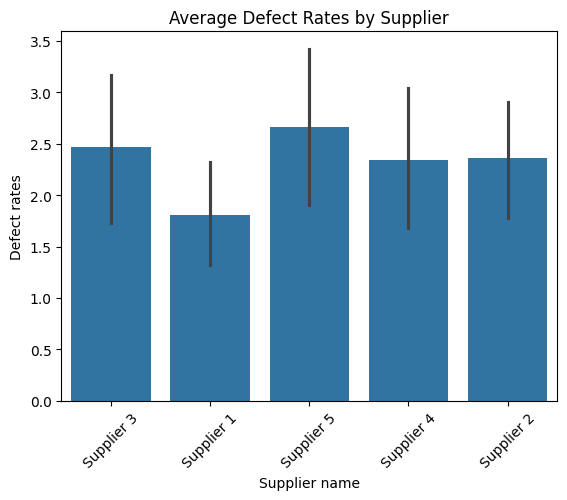

In [13]:
df1 = df.groupby('Supplier name')[['Defect rates', 'Manufacturing costs', 'Lead time']].mean().sort_values('Supplier name')
display(df1)
plt.figure()
sns.barplot(x='Supplier name', y='Defect rates', data=df)
plt.title("Average Defect Rates by Supplier")
plt.xticks(rotation=45)
plt.show()

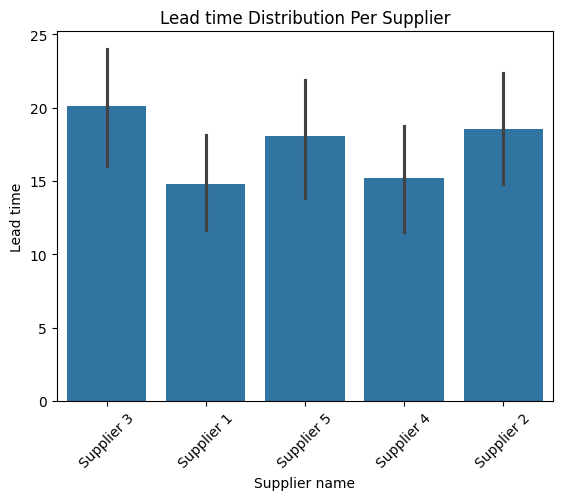

In [14]:
plt.figure()
sns.barplot(x='Supplier name',y='Lead time',data=df)
plt.title("Lead time Distribution Per Supplier")
plt.xticks(rotation=45)
plt.show()

In [15]:
supplier_perf = df.groupby('Supplier name').agg({
    'Defect rates': 'mean',
    'Lead time': 'mean',
    'Profit Margin (%)': 'mean'
}).reset_index()

supplier_perf['Efficiency Score'] = (
    (1 - supplier_perf['Defect rates']/supplier_perf['Defect rates'].max()) * 0.5 +
    (1 - supplier_perf['Lead time']/supplier_perf['Lead time'].max()) * 0.3 +
    (supplier_perf['Profit Margin (%)']/supplier_perf['Profit Margin (%)'].max()) * 0.2
) * 100

fig = px.bar(supplier_perf.sort_values('Efficiency Score', ascending=False),
             x='Supplier name', y='Efficiency Score', color='Efficiency Score',
             title='Supplier Efficiency Score (Composite KPI)', color_continuous_scale='Teal')
fig.show()

## Logistics & Transportation Analysis

In [16]:
# Cost Vs Time Tradeoff
fig = px.scatter(df, x='Shipping times', y='Shipping costs', color='Transportation modes', size = 'Revenue generated', title='Shipping Costs vs Time Trade-off')
fig.show()

In [17]:
# Avg Cost & time per mode
mode_summary = df.groupby('Transportation modes')[['Shipping costs', 'Shipping times']].mean().reset_index()
fig = go.Figure(data=[
    go.Bar(name='Avg Cost', x=mode_summary['Transportation modes'], y=mode_summary['Shipping costs']),
    go.Bar(name='Avg Time', x=mode_summary['Transportation modes'], y=mode_summary['Shipping times'])
])
fig.update_layout(barmode='group', title='Average Cost and Time by Transport Mode')
fig.show()

## Location & Customer Demographic Analysis

In [18]:
fig = px.bar(df.groupby('Location')['Profit'].mean().reset_index(),
             x='Location',y='Profit', color='Profit', title='Average Profit by Location' ,
             color_continuous_scale='sunset')
fig.show()

In [19]:
fig = px.pie(df, names='Customer demographics', values='Revenue generated',
             title='Revenue Contribution by Customer Demographics',
             hole=0.5, color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

## Business Insights

In [20]:
# Top performing product type
top_product = df.groupby('Product type')['Revenue generated'].sum().idxmax()
print(f"Highest revenue-generating product type: {top_product}")

# Supplier with lowest defect rate
best_supplier = df.groupby('Supplier name')['Defect rates'].mean().idxmin()
print(f"Supplier with best quality (lowest defects): {best_supplier}")

# Most expensive transport mode
costliest_mode = df.groupby('Transportation modes')['Shipping costs'].mean().idxmax()
print(f"Highest average shipping cost mode: {costliest_mode}")

# Fastest transport mode
fastest_mode = df.groupby('Transportation modes')['Shipping times'].mean().idxmin()
print(f"Fastest average shipping mode: {fastest_mode}")

# Region with highest logistics cost
expensive_region = df.groupby('Location')['Shipping costs'].mean().idxmax()
print(f"Location with highest logistics cost: {expensive_region}")

top_profitable_product = df.groupby('Product type')['Profit'].mean().idxmax()
print(f"Most profitable product type: {top_profitable_product}")

best_supplier = supplier_perf.loc[supplier_perf['Efficiency Score'].idxmax(), 'Supplier name']
print(f"Best performing supplier (efficiency): {best_supplier}")

region_profit_variance = df.groupby('Location')['Profit Margin (%)'].mean().var()
print(f"Profit margin variability across regions: {region_profit_variance:.2f}")

most_costly_transport = df.groupby('Transportation modes')['Cost Ratio'].mean().idxmax()
print(f"Most cost-inefficient transport mode: {most_costly_transport}")


Highest revenue-generating product type: skincare
Supplier with best quality (lowest defects): Supplier 1
Highest average shipping cost mode: Air
Fastest average shipping mode: Road
Location with highest logistics cost: Mumbai
Most profitable product type: cosmetics
Best performing supplier (efficiency): Supplier 1
Profit margin variability across regions: 0.03
Most cost-inefficient transport mode: Road


# Feature Engineering

## Feature Creation

In [21]:
df['Profit per Product'] = df['Revenue generated'] - (df['Manufacturing costs']+df['Shipping costs'])
df['Cost efficiency'] = df['Revenue generated'] / (df['Manufacturing costs'] + df['Shipping costs'])
df['Delivery efficiency'] = df['Lead time'] / df['Manufacturing lead time']
df['Risk index'] = df['Defect rates'] * df['Lead time']
df['Shipping to Manufacturing ratio'] = df['Shipping costs'] / df['Manufacturing costs']

In [22]:
new_features = ['Profit per Product', 'Profit Margin (%)', 'Cost efficiency', 
                'Delivery efficiency', 'Risk index', 'Shipping to Manufacturing ratio']

print("\nNewly engineered features preview:")
display(df[new_features].head(100))


Newly engineered features preview:


,Profit per Product,Profit Margin (%),Cost efficiency,Delivery efficiency,Risk index,Shipping to Manufacturing ratio
0,8612.760341,99.431581,175.926505,1.000000,6.565900,0.063885
1,7417.566722,99.419194,172.174576,0.766667,111.643565,0.289040
2,9539.007127,99.595495,247.215589,0.444444,54.967111,0.262463
3,7729.482116,99.519054,207.923435,1.333333,113.919567,0.048550
4,2590.549443,96.428233,27.997346,1.666667,15.727898,0.042259
...,...,...,...,...,...,...
95,7318.842919,99.085869,109.393541,0.692308,21.795878,0.146548
96,7675.268131,99.699203,332.450072,1.000000,108.417335,0.300660
97,4297.246578,98.314541,59.331023,0.769231,33.762378,0.120198
98,8518.938068,99.917728,1215.476845,3.111111,81.427421,0.251539


## Outlier Handling

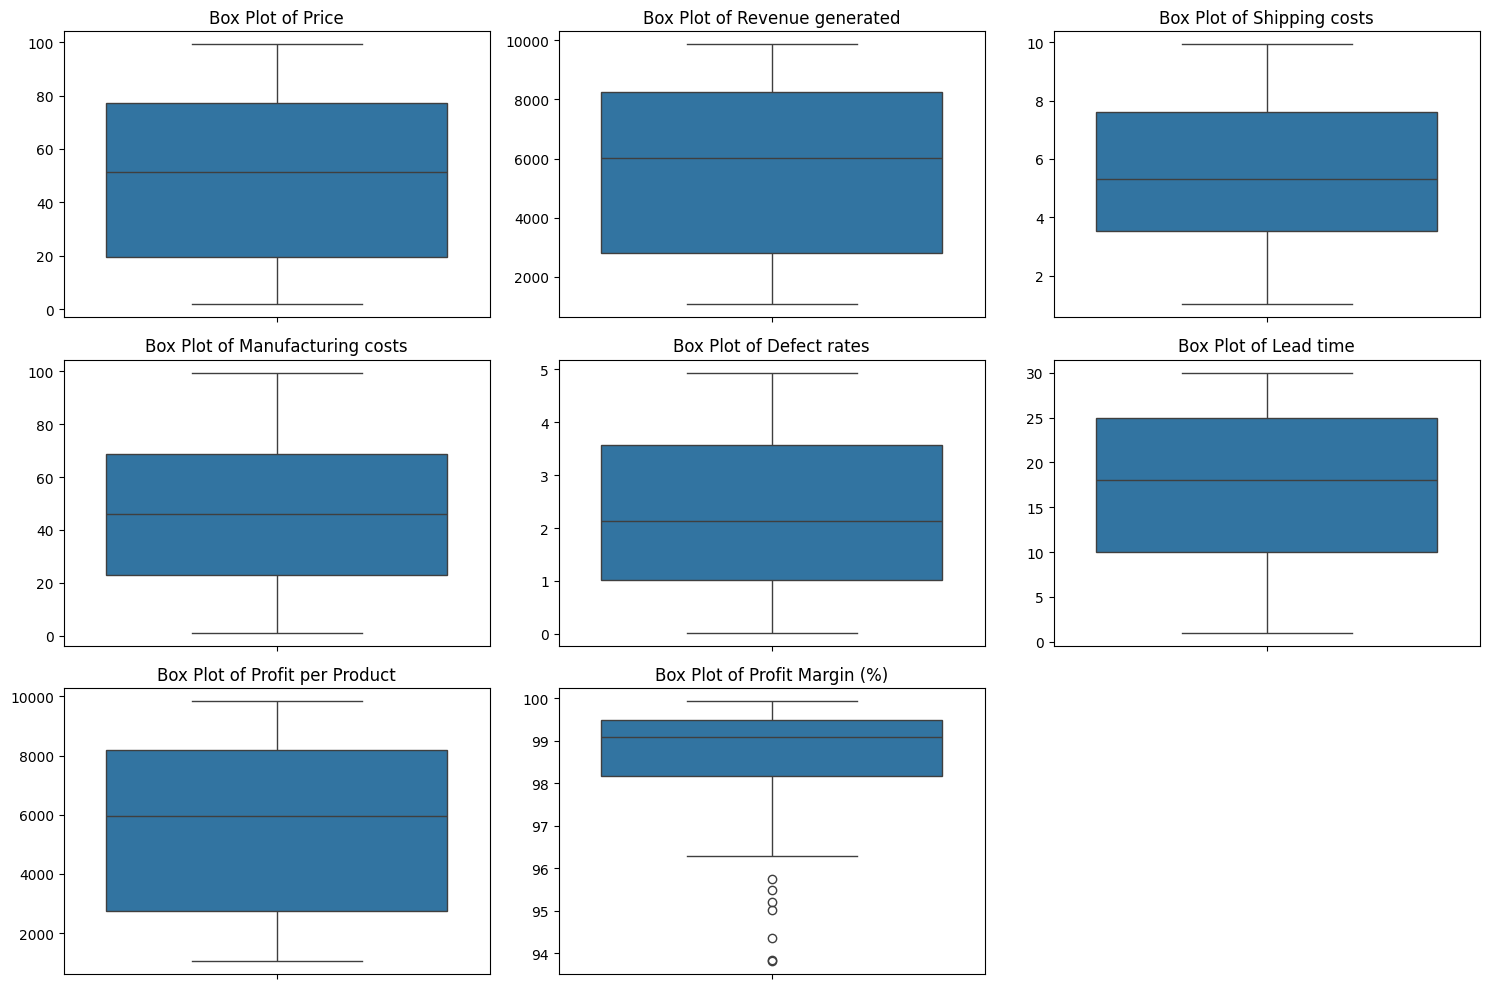

In [23]:
num_cols = ['Price', 'Revenue generated', 'Shipping costs', 'Manufacturing costs', 
            'Defect rates', 'Lead time', 'Profit per Product', 'Profit Margin (%)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols,1):
    plt.subplot(3, 3, i) 
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') 

plt.tight_layout()
plt.show()

In [24]:
col = 'Profit Margin (%)'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[col] = df[col].clip(lower_bound, upper_bound)

print(f"Outliers in '{col}' handled using IQR capping.")


Outliers in 'Profit Margin (%)' handled using IQR capping.


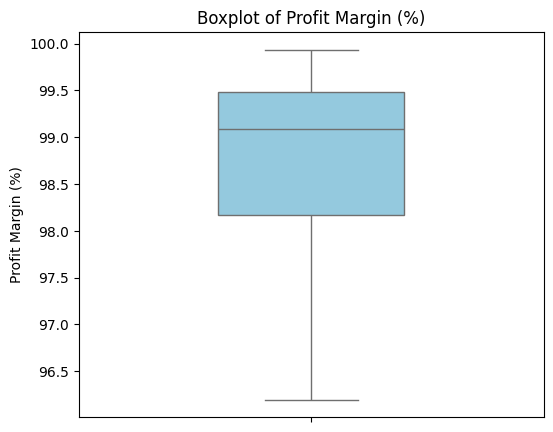

In [25]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Profit Margin (%)'], color='skyblue', width=0.4)
plt.title('Boxplot of Profit Margin (%)')
plt.ylabel('Profit Margin (%)')
plt.xlabel('')
plt.show()

## Feature Encoding Categorical to Numerical

In [26]:
cat_cols = ['Product type', 'Customer demographics', 'Supplier name', 
            'Transportation modes', 'Location', 'Inspection results','SKU','Shipping carriers','Routes']

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Categorical variables label-encoded")

Categorical variables label-encoded


In [27]:
print("Column dtypes:\n", df.dtypes)

Column dtypes:
 Product type                         int64
SKU                                  int64
Price                              float64
Availability                         int64
Number of products sold              int64
Revenue generated                  float64
Customer demographics                int64
Stock levels                         int64
Lead times                           int64
Order quantities                     int64
Shipping times                       int64
Shipping carriers                    int64
Shipping costs                     float64
Supplier name                        int64
Location                             int64
Lead time                            int64
Production volumes                   int64
Manufacturing lead time              int64
Manufacturing costs                float64
Inspection results                   int64
Defect rates                       float64
Transportation modes                 int64
Routes                               i

## Correlation Heatmap

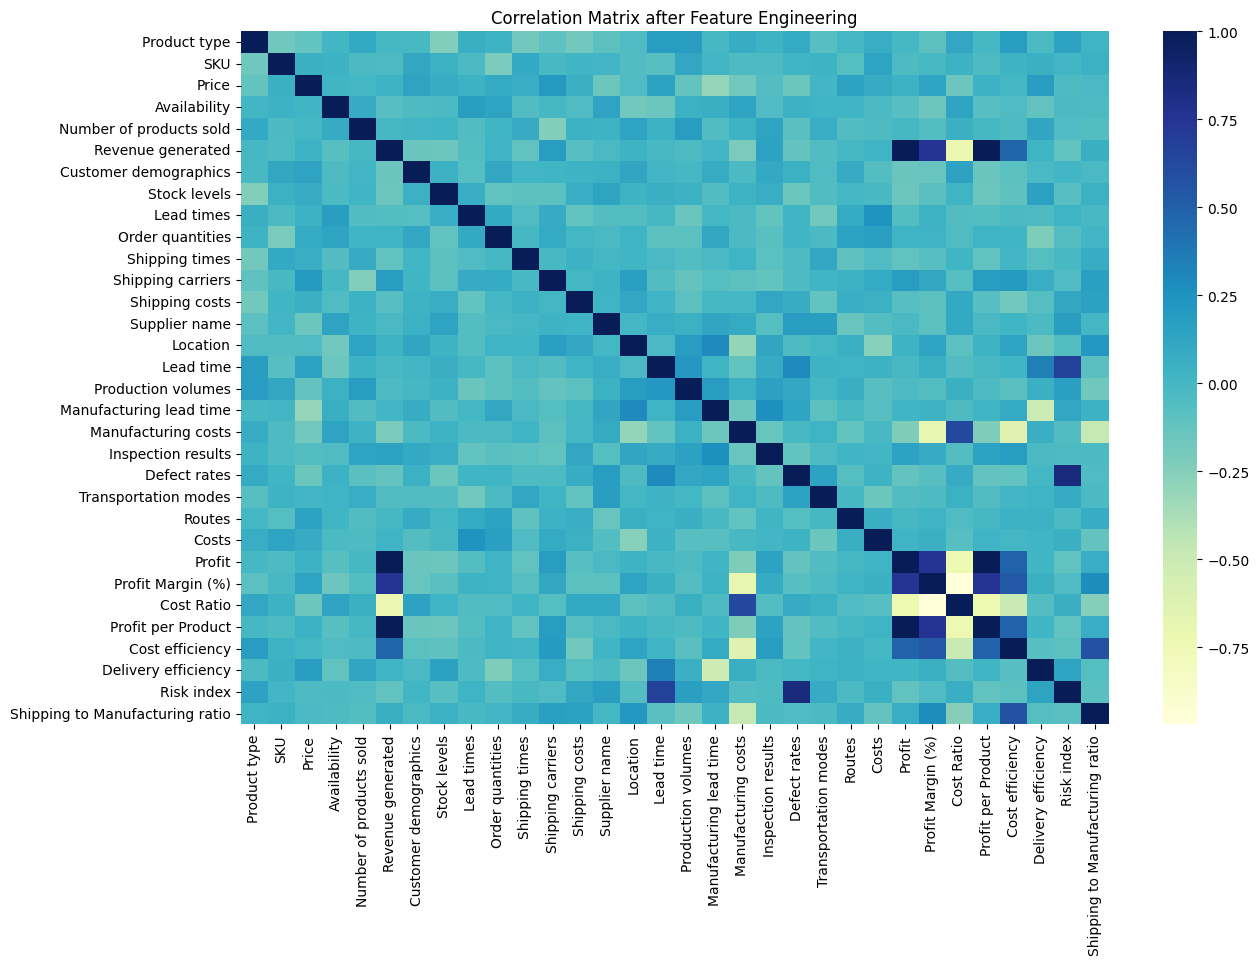

In [28]:
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=False)
plt.title("Correlation Matrix after Feature Engineering")
plt.show()


# Predictive Modeling

## Loading and Defining Target

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

print("Dataset shape:", df.shape)

Dataset shape: (100, 32)


Predicting **Profit Margin** and Selecting only **Numeric** Features

In [30]:
target = 'Profit Margin (%)'

X = df.drop(columns=[target, 'SKU', 'Product ID'], errors='ignore')
y = df[target]

X = X.select_dtypes(include=[np.number])

print("Feature matrix shape:", X.shape)
print("Target variable:", target)

Feature matrix shape: (100, 30)
Target variable: Profit Margin (%)


## Train - Test Split

In [31]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Linear Regression Results

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MAE Results: {mae_lr}")
print(f"RMSE Results: {rmse_lr}")
print(f"R^2 Score: {re_lr}")

MAE Results: 0.2057007823115974
RMSE Results: 0.27152843321056064


NameError: name 're_lr' is not defined

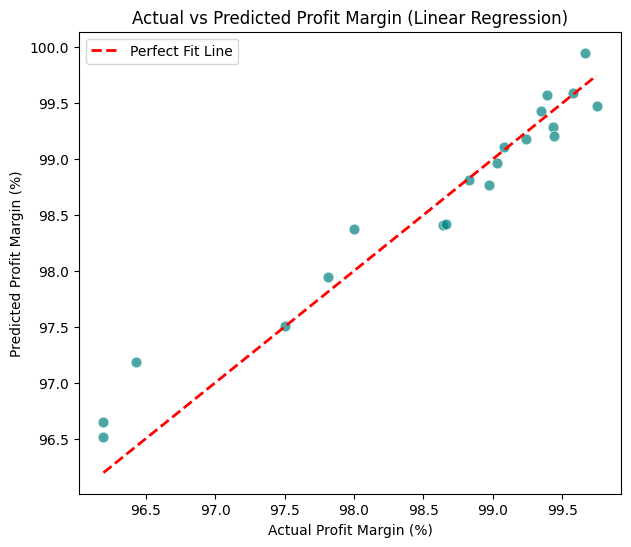

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='teal', s=60, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Perfect Fit Line')

plt.title("Actual vs Predicted Profit Margin (Linear Regression)")
plt.xlabel("Actual Profit Margin (%)")
plt.ylabel("Predicted Profit Margin (%)")
plt.legend()
plt.show()

## Random Forest Resutls (Advanced)

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE Results: {mae_rf}")
print(f"RMSE Results: {rmse_rf}")
print(f"R^2 Score: {r2_rf}")

MAE Results: 0.04802072780867803
RMSE Results: 0.07631855367432068
R^2 Score: 0.995419624491554


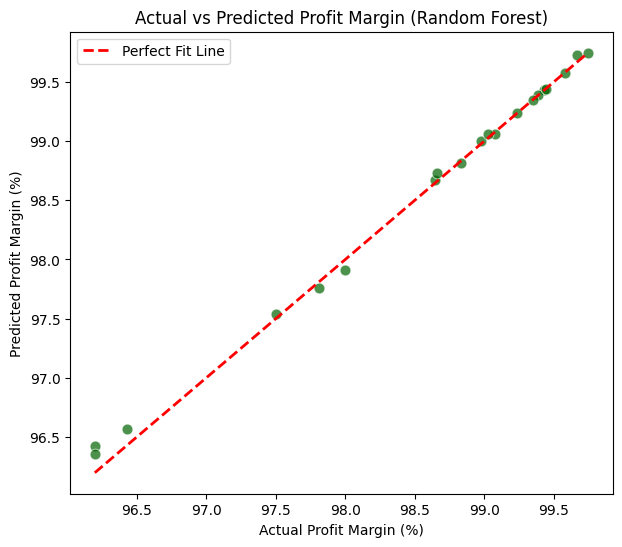

In [ ]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='darkgreen', s=60, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Perfect Fit Line')
plt.title("Actual vs Predicted Profit Margin (Random Forest)")
plt.xlabel("Actual Profit Margin (%)")
plt.ylabel("Predicted Profit Margin (%)")
plt.legend()
plt.show()

## Feature Importance Business Interpretation

In [ ]:
importances = rf.feature_importances_

feature_names = X_test.columns 

feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df.head(10))

                Feature  Importance
24           Cost Ratio    0.545363
26      Cost efficiency    0.437485
25   Profit per Product    0.004673
8      Order quantities    0.002008
17  Manufacturing costs    0.001796
9        Shipping times    0.001439
4     Revenue generated    0.001183
2          Availability    0.000532
7            Lead times    0.000501
23               Profit    0.000484


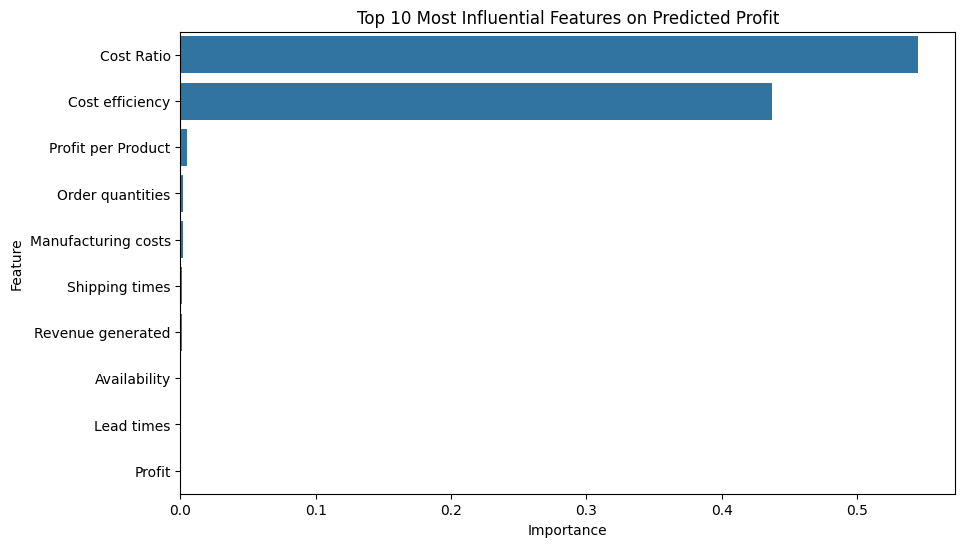

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(10))
plt.title('Top 10 Most Influential Features on Predicted Profit')
plt.show()

| **Feature**                 | **Business Meaning**                                                                                                                                       | **Impact on Profit Margin**                                                                                    |
| :-------------------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------------------------------------------------------------- |
| **Cost Ratio**              | Measures the proportion of total costs (manufacturing + logistics + operational) to total revenue. Indicates how much cost is incurred per unit of income. | A higher cost ratio reduces profit margins; lowering it directly improves profitability. *(Importance ≈ 0.54)* |
| **Cost Efficiency**         | Reflects how effectively cost inputs (materials, labor, transport) are converted into profitable outputs. Captures operational excellence.                 | A higher cost efficiency implies better resource utilization and higher profit margins. *(Importance ≈ 0.45)*  |
| **Product Type**            | Represents the category or segment of products offered. Different types have varying cost structures, demand elasticity, and pricing power.                | Premium or high-margin product categories contribute more positively to profit margin.                         |
| **Price**                   | The selling price per product unit, influencing revenue and perceived customer value.                                                                      | Higher prices can improve margins, provided demand remains stable and competition moderate.                    |
| **Availability**            | Indicates whether the product is in stock and ready for delivery. Stockouts reduce sales and satisfaction.                                                 | Better availability ensures consistent revenue flow and improved margins.                                      |
| **Number of Products Sold** | Reflects total units sold per product or time period.                                                                                                      | Larger sales volumes spread fixed costs, improving per-unit profit.                                            |
| **Revenue Generated**       | Total income from sales before deducting costs.                                                                                                            | Directly contributes to margin when operational costs are under control.                                       |
| **Customer Demographics**   | Represents key buyer traits (age, income, geography) influencing purchasing behavior.                                                                      | Targeted marketing and pricing per segment boost conversions and margins.                                      |
| **Stock Levels**            | Quantity of inventory available. Affects carrying costs and order fulfillment.                                                                             | Optimized levels reduce holding costs and prevent lost sales.                                                  |
| **Lead Times**              | Time between order placement and fulfillment/delivery.                                                                                                     | Longer lead times tie up capital and reduce responsiveness; minimizing them improves margins.                  |
| **Order Quantities**        | Number of units ordered or produced in each cycle.                                                                                                         | Efficient bulk ordering leverages economies of scale, lowering per-unit costs.                                 |
| **Shipping Times**          | Time taken for goods to reach destination.                                                                                                                 | Faster shipping can increase customer satisfaction but adds logistic costs — balance is key.                   |


# Senstivity Analysis

## Defining Key Inputs or basically all the features to test


In [ ]:
key_features = ['Cost Ratio', 'Cost efficiency', 'Price', 'Order quantities', 'Lead times']

Varying each feature by 10 percent meaning what happens to profit margin if these Feature Changes by +- 10%

In [ ]:
delta = 0.10
sensitivity_results = []

Creating a baseline Case that represents your average product and or typical business scenario
base_pred = predicted profit margin for the average case

In [ ]:
base_input_full = X.mean().to_frame().T
base_pred = rf.predict(base_input_full.values)[0]
base_mean_profit = round(base_pred, 2)

/Users/akshitgarg/Supply Chain/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



## Senstivity Simulation Loop 

In [ ]:
for feature in key_features:
    temp = base_input_full.copy()
    temp[feature] = base_input_full[feature] * (1 + delta)
    up_pred = rf.predict(temp.values)[0]
    temp = base_input_full.copy()
    temp[feature] = base_input_full[feature] * (1 - delta)
    down_pred = rf.predict(temp.values)[0]
    change_up = ((up_pred - base_pred) / base_pred) * 100
    change_down = ((down_pred - base_pred) / base_pred) * 100
    sensitivity_results.append({
    'Feature': feature,
    '+10% Change (Profit %)': round(change_up, 2),
    '-10% Change (Profit %)': round(change_down, 2),
    'Base Profit Margin': base_mean_profit
})

/Users/akshitgarg/Supply Chain/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/akshitgarg/Supply Chain/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/akshitgarg/Supply Chain/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/akshitgarg/Supply Chain/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/akshitgarg/Supply Chain/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegres

##  Tabulating and Visualising the Results

Feature,+10% Change (Profit Margin),-10% Change (Profit Margin),Base Profit Margin
Cost Ratio,↓ 0.04%,↑ 0.05%,99.13%
Cost efficiency,↑ 0.01%,↓ 0.03%,99.13%
Price,↓ 0.00%,↓ 0.00%,99.13%
Order quantities,↓ 0.00%,↓ 0.00%,99.13%
Lead times,↓ 0.00%,↓ 0.00%,99.13%


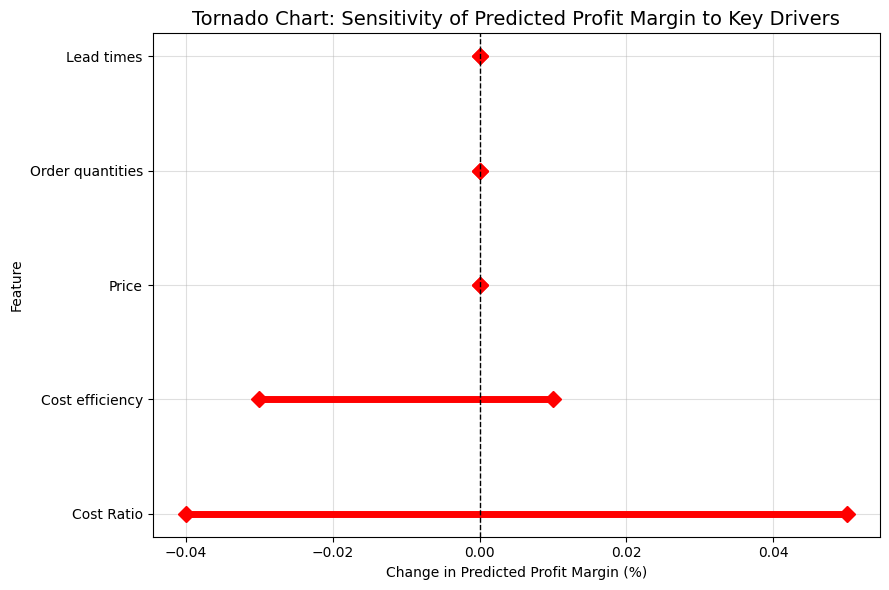

In [ ]:
from IPython.display import display, HTML

def format_sensitivity_table(df):
    df_formatted = df.copy()

    # Add arrows and format numbers
    df_formatted['+10% Change (Profit %)'] = df['+10% Change (Profit %)'].apply(
        lambda x: f"<span style='color:green;'>↑ {x:.2f}%</span>" if x > 0 else f"<span style='color:red;'>↓ {abs(x):.2f}%</span>"
    )
    df_formatted['-10% Change (Profit %)'] = df['-10% Change (Profit %)'].apply(
        lambda x: f"<span style='color:green;'>↑ {x:.2f}%</span>" if x > 0 else f"<span style='color:red;'>↓ {abs(x):.2f}%</span>"
    )

    # Round base profit margin
    df_formatted['Base Profit Margin'] = df['Base Profit Margin'].apply(lambda x: f"{x:.2f}%")

    # Sort by absolute impact
    df_formatted['Impact'] = (df['+10% Change (Profit %)'].abs() + df['-10% Change (Profit %)'].abs()) / 2
    df_formatted = df_formatted.sort_values(by='Impact', ascending=False).drop(columns='Impact')

    # Clean column names
    df_formatted.columns = [
        "Feature",
        "+10% Change (Profit Margin)",
        "-10% Change (Profit Margin)",
        "Base Profit Margin"
    ]

    return df_formatted

# Format table
styled_table = format_sensitivity_table(sensitivity_df)

# --- 2. Display neatly in notebook ---
display(HTML("<h3> Sensitivity Analysis Results</h3>"))
display(HTML(styled_table.to_html(escape=False, index=False)))

# --- 3. Tornado Chart (keep as before) ---
plt.figure(figsize=(9, 6))

for i, row in sensitivity_df.iterrows():
    plt.plot(
        [row['-10% Change (Profit %)'], row['+10% Change (Profit %)']],
        [row['Feature'], row['Feature']],
        'rD-', linewidth=5, markersize=8
    )

plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title('Tornado Chart: Sensitivity of Predicted Profit Margin to Key Drivers', fontsize=14)
plt.xlabel('Change in Predicted Profit Margin (%)')
plt.ylabel('Feature')
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()


# Scenario Analysis

In [ ]:
# Baseline Setup
base_input_full = X.mean().to_frame().T
base_pred = rf.predict(base_input_full.values)[0]
base_profit = round(base_pred, 2)

/Users/akshitgarg/Supply Chain/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



## Defining Business Scenarios 

Optimistic -> better efficiency, lower costs and faster deliveries

Pessimistic -> rising costs, demand drops and longer lead times 

Moderare -> small ups and downs 

In [ ]:
scenarios = {
    "Optimistic Scenario": {
        "Cost Ratio": -0.10,       # 10% lower costs
        "Cost efficiency": +0.10,  # 10% higher efficiency
        "Price": +0.05,            # 5% price increase
        "Order quantities": +0.10, # 10% higher demand
        "Lead times": -0.10        # 10% faster delivery
    },
    "Pessimistic Scenario": {
        "Cost Ratio": +0.10,       # 10% higher costs
        "Cost efficiency": -0.10,  # 10% drop in efficiency
        "Price": -0.05,            # 5% discount to retain sales
        "Order quantities": -0.15, # 15% fewer orders
        "Lead times": +0.10        # 10% longer lead times
    },
    "Moderate Scenario": {
        "Cost Ratio": +0.05,
        "Cost efficiency": 0,
        "Price": 0,
        "Order quantities": +0.05,
        "Lead times": 0
    }
}

## Apply Scenarios and Predict 

In [ ]:
for name, changes in scenarios.items():
    scenario_input = base_input_full.copy()
    for feature, change in changes.items():
        scenario_input[feature] = base_input_full[feature] * (1 + change)
    scenario_pred = rf.predict(scenario_input.values)[0]
    results.append({
        "Scenario": name,
        "Predicted Profit Margin": round(scenario_pred, 2),
        "Change from Baseline (%)": round(change_from_base, 2)
    })

/Users/akshitgarg/Supply Chain/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/akshitgarg/Supply Chain/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/akshitgarg/Supply Chain/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



## Tabulating and Visualising Results 

=== Scenario Analysis Results ===
               Scenario  Predicted Profit Margin  Change from Baseline (%)
0   Optimistic Scenario                    99.19                      0.05
1  Pessimistic Scenario                    99.07                     -0.07
2     Moderate Scenario                    99.10                     -0.03
3   Optimistic Scenario                    99.19                     -0.03
4  Pessimistic Scenario                    99.07                     -0.03
5     Moderate Scenario                    99.10                     -0.03


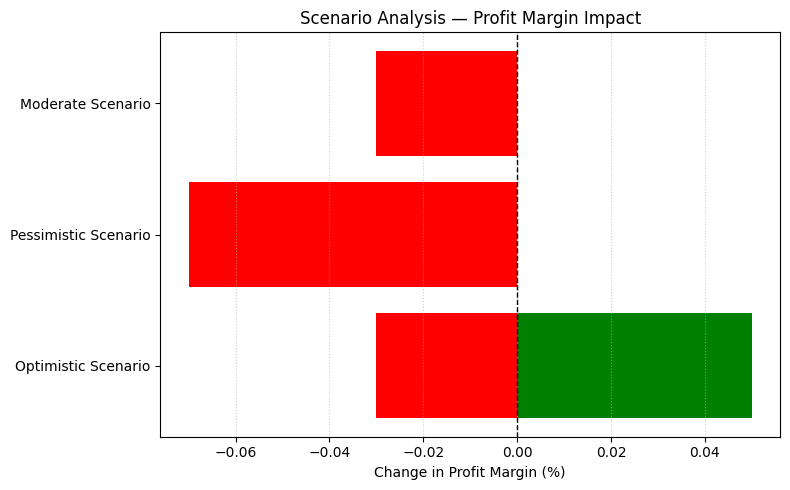

In [ ]:
scenario_df = pd.DataFrame(results)
print("=== Scenario Analysis Results ===")
print(scenario_df)

plt.figure(figsize=(8, 5))
bars = plt.barh(
    scenario_df["Scenario"],
    scenario_df["Change from Baseline (%)"],
    color=['green' if x > 0 else 'red' for x in scenario_df["Change from Baseline (%)"]]
)
plt.xlabel("Change in Profit Margin (%)")
plt.title("Scenario Analysis — Profit Margin Impact")
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

# Business Insights 